In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as Circle

import numpy as np

import warnings
warnings.filterwarnings("ignore")

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [2]:
df = pd.read_csv("dvip_bnn2.csv")
df

,dataset_name,vip_layers,zero_mean_prior,split,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
0,concrete,[1],False,9,546.067139,6.383588,3.272287,3.540171,167.317413,7.366388,3.414234,4.081610
1,concrete,[2],False,6,564.909119,3.721447,2.807070,2.120423,518.371460,5.013071,3.013719,2.809576
2,concrete,[2],False,17,493.183472,3.371902,2.711352,1.935397,602.855286,6.724048,3.392299,3.308057
3,winered,[3],True,10,1711.673828,0.591477,0.894172,0.328716,270.452148,0.550289,0.833900,0.313703
4,energy,[2],False,7,-731.364319,0.402898,0.561309,0.224042,288.046204,0.460700,0.656903,0.257806
...,...,...,...,...,...,...,...,...,...,...,...,...
1002,naval,[1],True,17,-12350.960938,0.000908,-5.591805,0.000469,-1267.626831,0.000975,-5.515191,0.000492
1003,concrete,[3],False,6,397.846558,3.631786,2.741765,2.024595,428.101746,4.860594,2.958968,2.656058
1004,winered,[3],True,3,1716.127686,0.583995,0.880916,0.324875,291.086090,0.614048,0.930762,0.338283
1005,energy,[1],False,7,39.980724,2.200236,2.213575,1.207860,87.604584,2.340856,2.274959,1.279144


Group table by their common parameters and compute mean and std over split

In [3]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name",  "zero_mean_prior", "vip_layers"]).agg(["mean", std])
full_df


split              LOSS_train  \
                                              mean       std          mean   
dataset_name zero_mean_prior vip_layers                                      
boston       False           [1]          9.500000  1.289380    261.774160   
                             [2]          9.500000  1.289380    296.742729   
                             [3]          9.500000  1.289380    228.248244   
                             [4]          9.500000  1.289380    234.755922   
                             [5]          9.500000  1.289380    261.641039   
             True            [1]          9.500000  1.289380    287.759677   
                             [2]          9.500000  1.289380    319.765219   
                             [3]          9.500000  1.289380    262.548924   
                             [4]          9.500000  1.289380    268.976556   
                             [5]          9.500000  1.289380    276.889478   
concrete     False           [1]          9.500000  1.289380    530.207101   
                             [2]          9.500000  1.289380    538.247212   
                             [3]          9.500000  1.289380    415.640079   
                             [4]          9.500000  1.289380    386.549976   
                             [5]          9.500000  1.289380    424.664676   
             True            [1]          9.500000  1.289380    606.414462   
                             [2]          9.500000  1.289380    530.151575   
                             [3]          9.500000  1.289380    415.847893   
                             [4]          9.500000  1.289380    392.233144   
                             [5]          9.500000  1.289380    445.293530   
energy       False           [1]          9.500000  1.289380     27.850671   
                             [2]          9.500000  1.289380   -737.614389   
                             [3]          9.500000  1.289380   -530.509816   
                             [4]          9.500000  1.289380   -531.598111   
                             [5]          9.500000  1.289380   -379.439307   
             True            [1]          9.500000  1.289380     43.946385   
                             [2]          9.500000  1.289380   -706.848834   
                             [3]          9.500000  1.289380   -647.201904   
                             [4]          9.500000  1.289380   -501.113196   
                             [5]          9.500000  1.289380   -397.123941   
kin8nm       False           [1]         10.214286  1.632510   6849.939035   
                             [2]          9.777778  1.415426   2127.844354   
             True            [1]          9.388889  1.429709   7031.371148   
                             [2]          9.473684  1.356973   2159.303891   
naval        False           [1]          8.733333  1.443658 -11753.730534   
                             [2]         10.545455  1.653264 -16133.948597   
             True            [1]         10.357143  1.496960  -9840.827183   
                             [2]          9.500000  1.289380 -17272.471680   
power        False           [1]          8.230769  1.447928    -22.178385   
                             [2]         11.153846  1.487009   -182.098107   
             True            [1]          9.187500  1.317605    133.850272   
                             [2]         10.058824  1.461077   -184.624231   
protein      False           [1]          9.500000  1.427789  11780.148980   
             True            [1]          0.000000  0.000000  11872.683594   
winered      False           [1]          9.500000  1.289380   1698.690009   
                             [2]          9.500000  1.289380   1723.711194   
                             [3]          9.500000  1.289380   1726.824878   
                             [4]          9.500000  1.289380   2736.732947   
                             [5]          9.500000  1.289380   1809

# Comparative with other models

In [4]:
query = "zero_mean_prior == False"
vip = full_df.query(query)
#vip =  full_df.query("prior_kl == True and bnn_structure == '[10]'")
vip


split              LOSS_train  \
                                              mean       std          mean   
dataset_name zero_mean_prior vip_layers                                      
boston       False           [1]          9.500000  1.289380    261.774160   
                             [2]          9.500000  1.289380    296.742729   
                             [3]          9.500000  1.289380    228.248244   
                             [4]          9.500000  1.289380    234.755922   
                             [5]          9.500000  1.289380    261.641039   
concrete     False           [1]          9.500000  1.289380    530.207101   
                             [2]          9.500000  1.289380    538.247212   
                             [3]          9.500000  1.289380    415.640079   
                             [4]          9.500000  1.289380    386.549976   
                             [5]          9.500000  1.289380    424.664676   
energy       False           [1]          9.500000  1.289380     27.850671   
                             [2]          9.500000  1.289380   -737.614389   
                             [3]          9.500000  1.289380   -530.509816   
                             [4]          9.500000  1.289380   -531.598111   
                             [5]          9.500000  1.289380   -379.439307   
kin8nm       False           [1]         10.214286  1.632510   6849.939035   
                             [2]          9.777778  1.415426   2127.844354   
naval        False           [1]          8.733333  1.443658 -11753.730534   
                             [2]         10.545455  1.653264 -16133.948597   
power        False           [1]          8.230769  1.447928    -22.178385   
                             [2]         11.153846  1.487009   -182.098107   
protein      False           [1]          9.500000  1.427789  11780.148980   
winered      False           [1]          9.500000  1.289380   1698.690009   
                             [2]          9.500000  1.289380   1723.711194   
                             [3]          9.500000  1.289380   1726.824878   
                             [4]          9.500000  1.289380   2736.732947   
                             [5]          9.500000  1.289380   1809.526978   

                                                    RMSE_train            \
                                                std       mean       std   
dataset_name zero_mean_prior vip_layers                                    
boston       False           [1]           2.751273   3.124122  0.018627   
                             [2]           5.581690   2.120333  0.030530   
                             [3]           3.633954   1.932551  0.029453   
                             [4]           2.830295   1.636427  0.022113   
                             [5]           5.543718   1.735343  0.020632   
concrete     False           [1]           3.733930   6.279042  0.022159   
                             [2]           6.672121   3.664066  0.029249   
                             [3]           4.727446   3.683158  0.030860   
                             [4]           4.620801   3.267111  0.026570   
                             [5]           4.538294   3.108280  0.023617   
energy       False           [1]           3.545643   2.157231  0.013082   
                             [2]           3.350361   0.413183  0.001858   
                             [3]           5.912272   0.403384  0.003387   
                             [4]          12.262218   0.378860  0.002691   
                             [5]          11.077056   0.383890  0.002282   
kin8nm       False           [1]           4.690014   0.157825  0.000173   
                             [2]          24.711455   0.071046  0.000182   
naval        False           [1]         201.069252   0.000983  0.000020   
                             [2]         338.804524   0.000294  0.000010   
power        False           [1]

In [5]:
doubly = pd.read_csv("doubly.csv")
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std]).drop("split", axis = 1)
doubly

NLL                RMSE                CRPS          
                     mean       std      mean       std      mean       std
dataset  layers                                                            
boston   1       2.621324  0.061539  3.461930  0.172243  1.778254  0.054756
         2       2.619427  0.060715  3.464310  0.174090  1.775397  0.055053
         3       2.618580  0.057986  3.477714  0.176407  1.780114  0.056023
         4       2.612612  0.056778  3.459250  0.180476  1.768086  0.057338
         5       2.619665  0.058376  3.483772  0.184585  1.778915  0.059403
concrete 1       3.134538  0.016871  5.699006  0.128251  3.104325  0.057626
         2       3.137992  0.016458  5.709117  0.127669  3.113382  0.057095
         3       3.142599  0.016832  5.724927  0.129163  3.125693  0.058891
         4       3.134859  0.017792  5.658314  0.130668  3.083788  0.057433
         5       3.092611  0.015842  5.374571  0.115534  2.942421  0.051177
energy   1       1.141213  0.016797  0.713296  0.020260  0.414601  0.009610
         2       0.661802  0.019321  0.451084  0.012712  0.252025  0.005593
         3       0.711009  0.021007  0.462688  0.013160  0.262231  0.005888
         4       0.759983  0.021207  0.478973  0.014059  0.273281  0.006523
         5       0.700959  0.021684  0.458096  0.015404  0.259230  0.007059
kin8nm   1      -0.975375  0.003277  0.086898  0.000536  0.049229  0.000258
         2      -1.350378  0.004308  0.062584  0.000347  0.035030  0.000162
         3      -1.382660  0.006671  0.060735  0.000458  0.033985  0.000235
naval    1      -6.475724  0.117892  0.000285  0.000035  0.000185  0.000020
         2      -6.894672  0.101289  0.000152  0.000036  0.000119  0.000017
         3      -7.039468  0.049660  0.000085  0.000012  0.000091  0.000006
         4      -6.959729  0.055067  0.000109  0.000016  0.000102  0.000007
         5      -6.873125  0.072354  0.000159  0.000025  0.000120  0.000010
power    1       2.806324  0.009995  3.993163  0.040720  2.173505  0.011311
         2       2.770222  0.009873  3.850422  0.038183  2.075122  0.009159
         3       2.747370  0.012654  3.760601  0.049078  2.023911  0.015586
         4       2.732378  0.011725  3.702821  0.045233  1.984471  0.012649
         5       2.735273  0.010918  3.712386  0.041823  1.991525  0.009105
protein  1       2.907479  0.002265  4.428554  0.011083  2.481267  0.005884
         2       2.786240  0.002311  3.936413  0.010322  2.161253  0.004967
         3       2.715014  0.002847  3.708458  0.011970  2.002001  0.005932
         4       2.689973  0.002877  3.641484  0.011498  1.950791  0.005703
         5       2.692614  0.004289  3.663181  0.016545  1.957200  0.008180
wine_red 1       0.928739  0.012829  0.614669  0.008504  0.340628  0.004178
         2       0.928976  0.012711  0.614753  0.008461  0.340674  0.004151
         3       0.929331  0.012509  0.615001  0.008325  0.340852  0.004091
         4       0.929474  0.012561  0.614968  0.008397  0.340988  0.004120
         5       0.929893  0.012395  0.615139  0.008317  0.341113  0.004076

In [6]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and meake them invisible
    far = means - mean > 2*std
    far[0] = False
    means[far] = np.mean(means[~far])
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    if far[0] == False:
        ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    if far.any() != 0:
        x_min, x_max = ax.get_xlim()
        slope = (x_max - x_min)/5
        ax.arrow(x = x_max - slope, y = np.array(model_names)[far][0], 
                 dx = slope, dy =0, color = np.array(colors)[far][0],
                 width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    #vip100_query = vip100.query("dataset_name == @dataset").xs((metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()
    
    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {"VIP": item(vip_query.query("vip_layers == '[1]'").to_numpy()),
          "DVIP 2": item(vip_query.query("vip_layers == '[2]'").to_numpy()),
          "DVIP 3": item(vip_query.query("vip_layers == '[3]'").to_numpy()),
          "DVIP 4": item(vip_query.query("vip_layers == '[4]'").to_numpy()),
          "DVIP 5": item(vip_query.query("vip_layers == '[5]'").to_numpy()),
          #"VIP 100": item(vip100_query.query("vip_layers == '[1]'").to_numpy()),
          "DGP": item(doubly_query.query("layers == 1").to_numpy()),
          "DGP 2": item(doubly_query.query("layers == 2").to_numpy()),
          "DGP 3": item(doubly_query.query("layers == 3").to_numpy()) or np.nan,
          "DGP 4": item(doubly_query.query("layers == 4").to_numpy()) or np.nan,
          "DGP 5": item(doubly_query.query("layers == 5").to_numpy()) or np.nan
    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout(pad=3.0) # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize())
        axis.locator_params(axis="x", nbins=4)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
        Circle.Patch(color='orchid', label='Bayesian NN'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles)
        
    plt.savefig("../plots/" + metric + ("_train" if train_metrics else "") + "_" +query + ".pdf")
        

In [7]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = ["VIP", "DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5", "DGP", "DGP 2", "DGP 3", "DGP 4", "DGP 5"]
colors = {"VIP": "darkblue", 
          "DVIP 2": "teal", 
          "DVIP 3": "teal", 
          "DVIP 4": "teal", 
          "DVIP 5": "teal", 
          #"VIP 100": "darkblue", 
          "DGP": "darkblue",
          "DGP 2": "darkorange", 
          "DGP 3": "darkorange",
          "DGP 4": "darkorange",
          "DGP 5": "darkorange"}

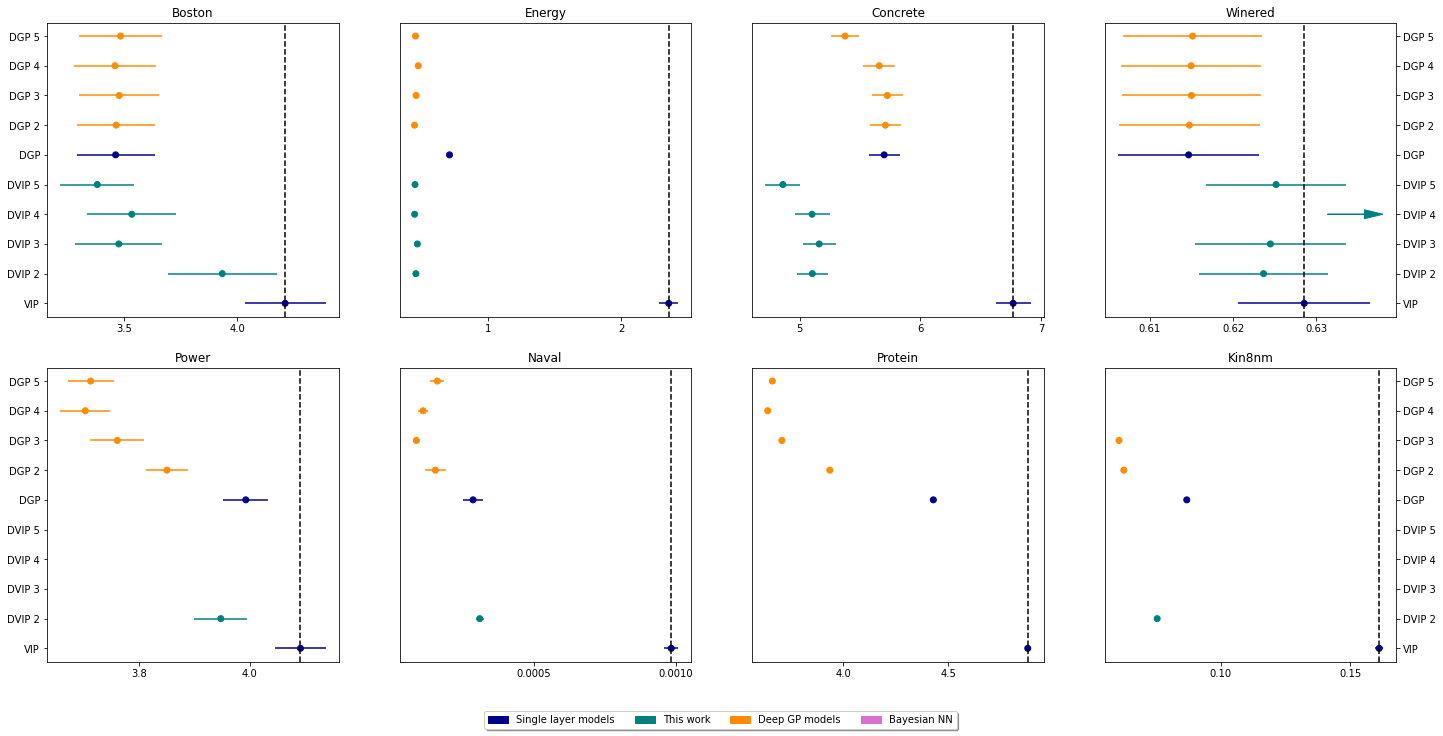

In [8]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

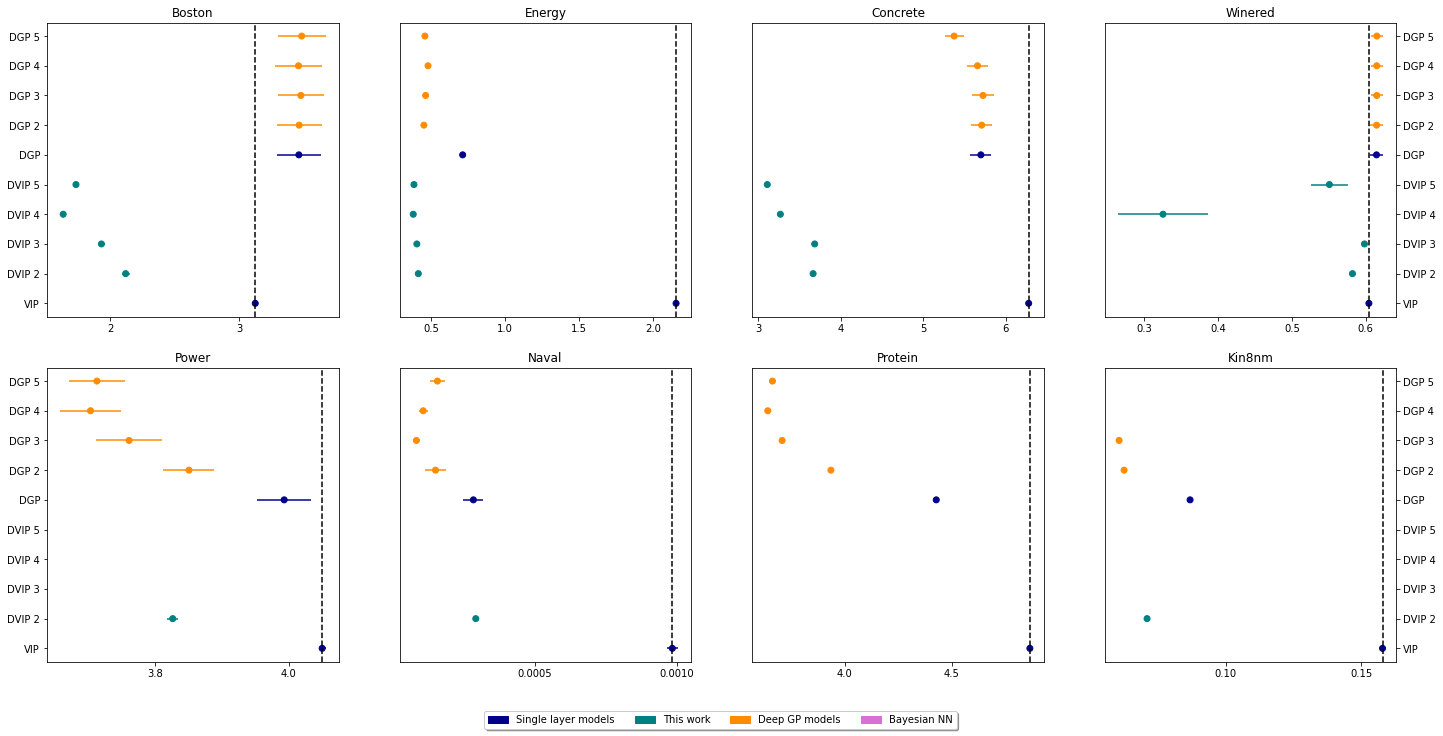

In [9]:
plot_datasets(dataset_names, model_names, colors, "RMSE", train_metrics = True)

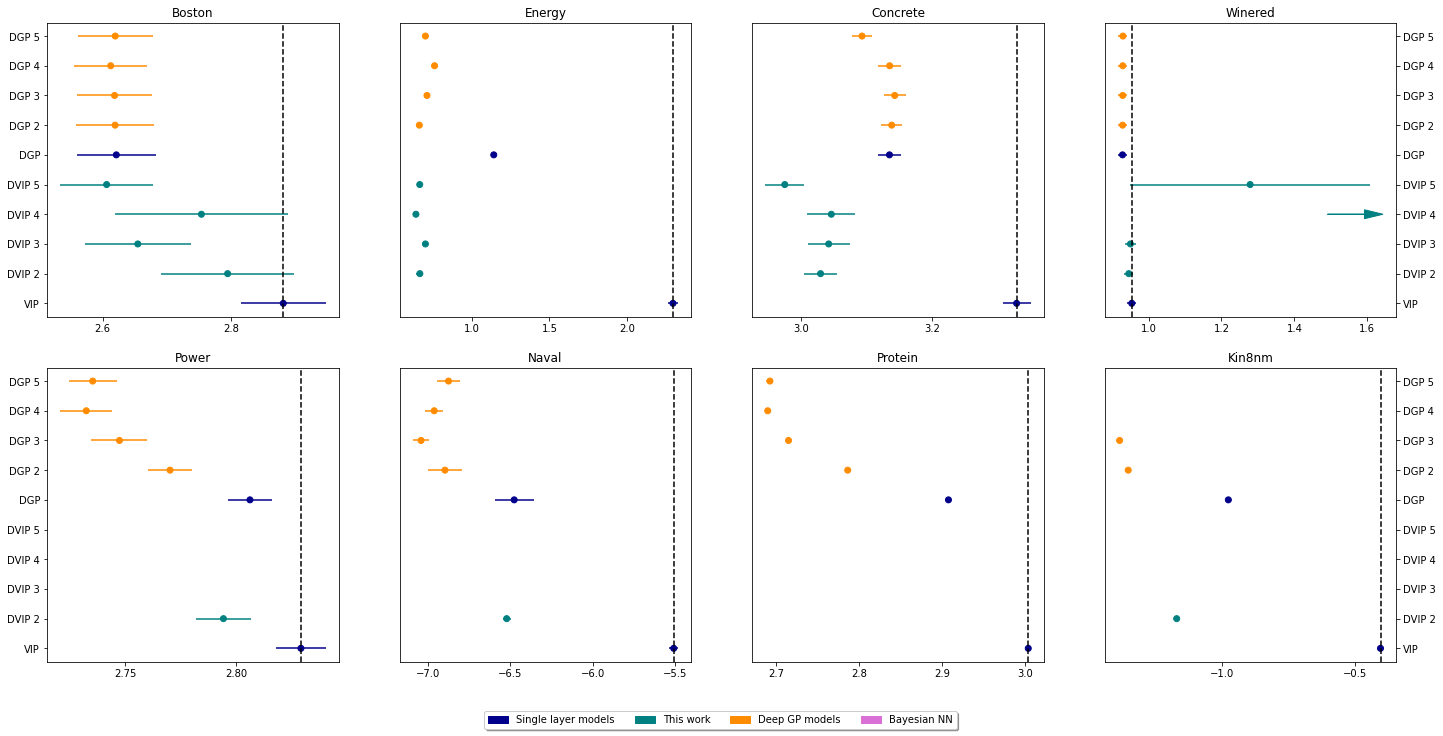

In [10]:
plot_datasets(dataset_names, model_names, colors, "NLL")

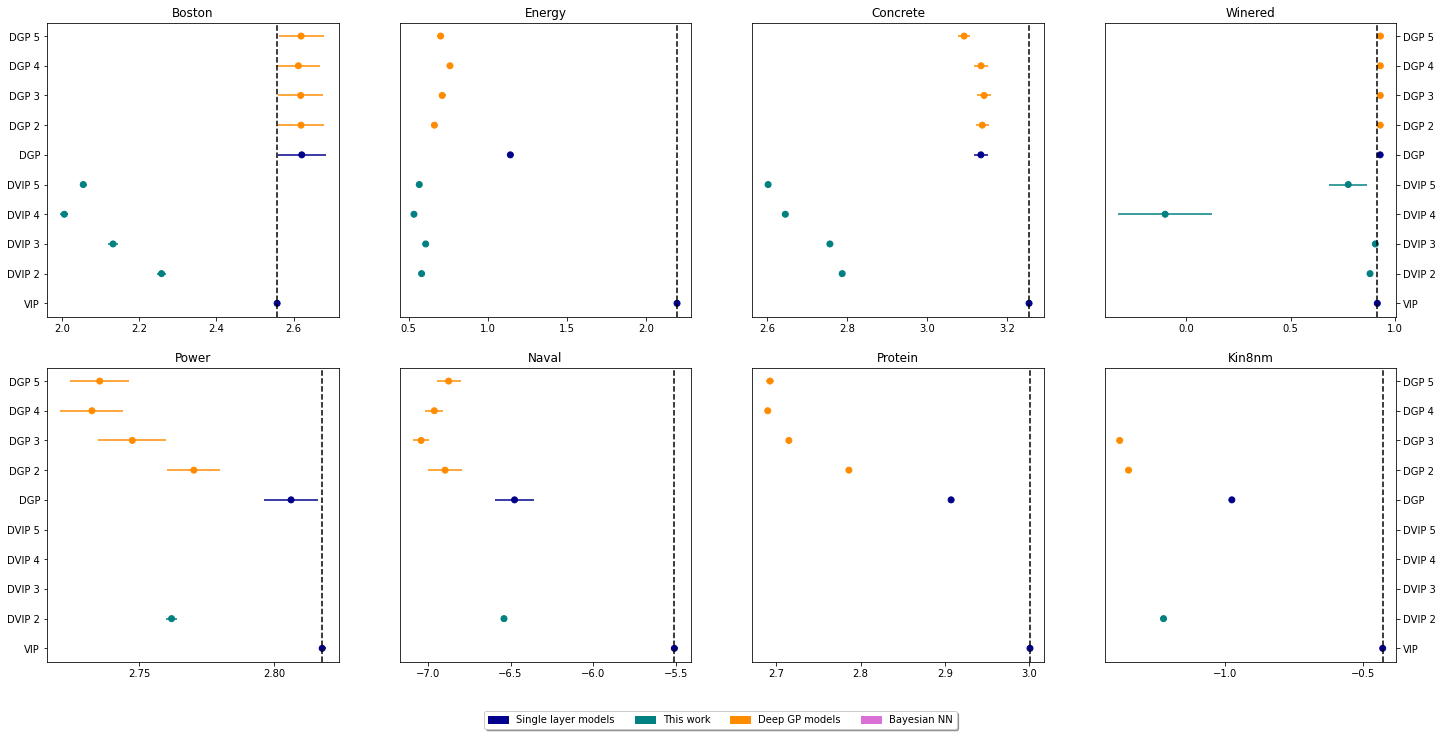

In [11]:
plot_datasets(dataset_names, model_names, colors, "NLL", train_metrics = True)

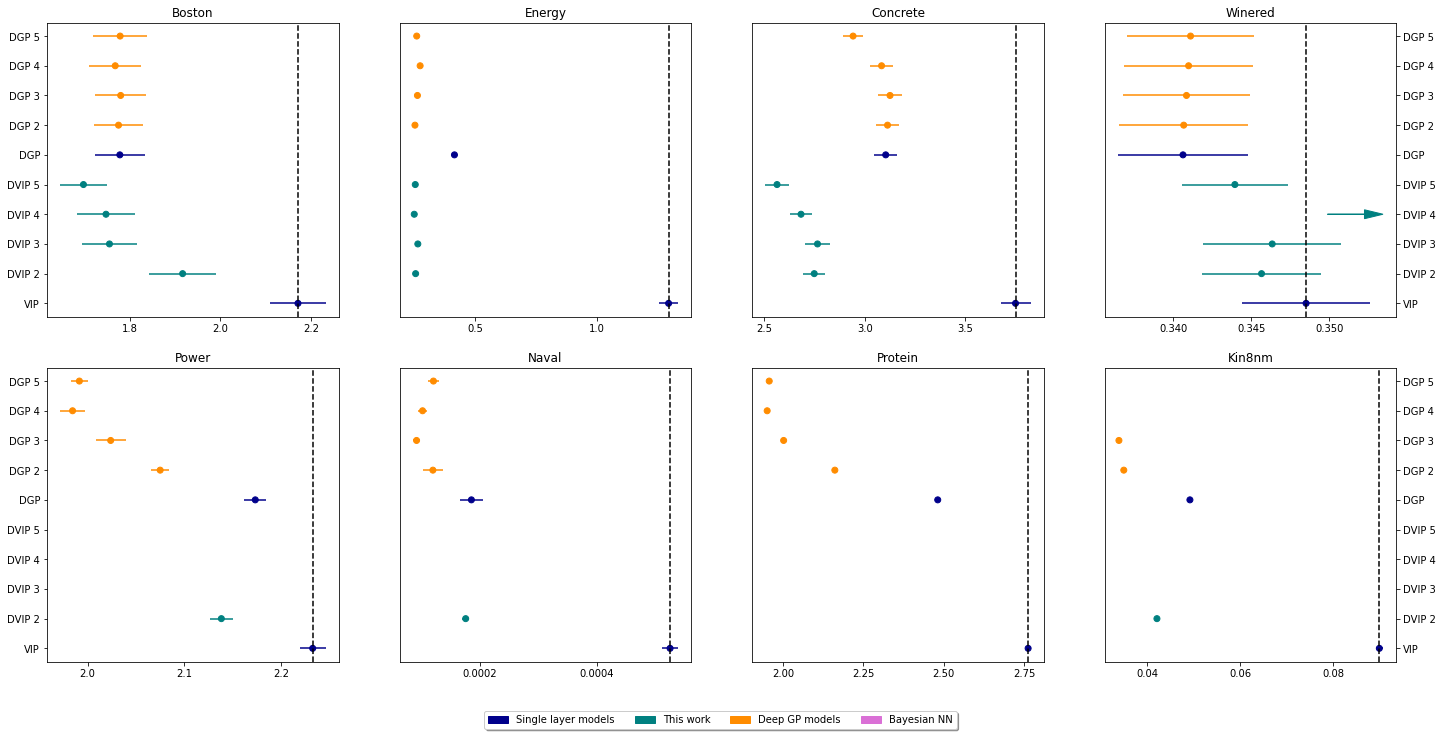

In [12]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

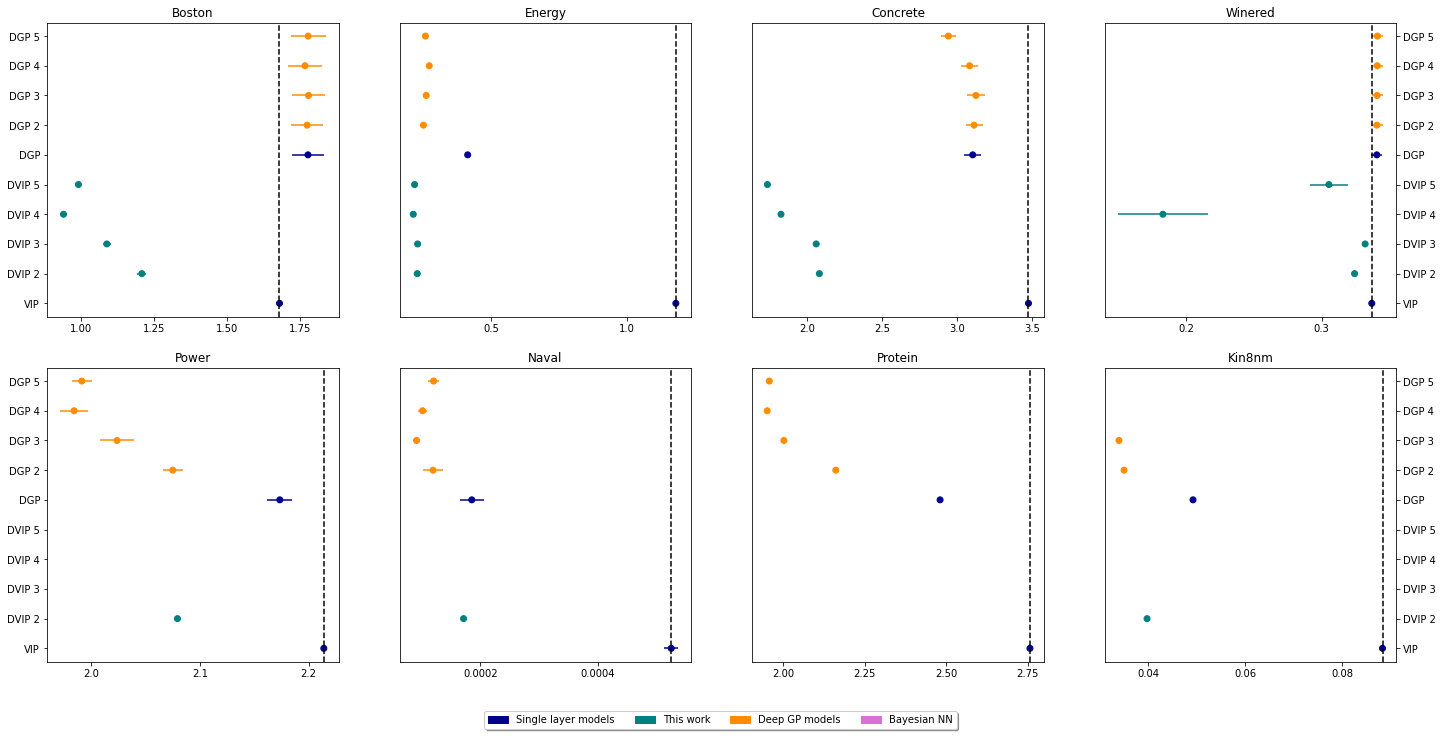

In [13]:
plot_datasets(dataset_names, model_names, colors, "CRPS", train_metrics = True)